# **PARTE I** (Al final está la parte II)

#📌 **1. Extracción**

In [1]:
#Librerías
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# URL de la API con los datos en formato JSON
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

In [3]:
# Solicita los datos desde el enlace de GitHub
response = requests.get(url)
data = response.json()

In [4]:
# Convierte los datos JSON anidados en un DataFrame de Pandas plano
df = pd.json_normalize(data)

# Muestra las primeras filas para revisar la estructura
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


**Notas:**

Se utiliza requests para descargar el archivo y pd.json_normalize para aplanar la estructura de los datos (ideal para este JSON, que tiene subdiccionarios).

Así se tiene el DataFrame listo para iniciar el análisis exploratorio y seguimiento de los pasos ETL.

#🔧 **2. Transformación**

**2.1 Conoce el conjunto de datos**

**Descripción**

Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

📌 Para facilitar este proceso, hemos creado un diccionario de datos con la descripción de cada columna. Aunque no es obligatorio utilizarlo, puede ayudarte a comprender mejor la información disponible.

🔗 Enlace al diccionario y a la API
¿Qué debes hacer?
- ✅ Explorar las columnas del dataset y verificar sus tipos de datos.
- ✅ Consultar el diccionario para comprender mejor el significado de las variables.
- ✅ Identificar las columnas más relevantes para el análisis de evasión.


In [5]:
# Tamaño (número de filas y columnas)
print("Tamaño del DataFrame:")
print(df.shape)

Tamaño del DataFrame:
(7267, 21)


Muestra el tamaño y primeras filas para entender el formato.

In [6]:
# Primeras filas para ver la estructura general
print("\nPrimeras filas del DataFrame:")
display(df.head())


Primeras filas del DataFrame:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Lista los tipos de datos y todas las columnas disponibles, usando la estructura del archivo (TelecomX_diccionario.md) como referencia de significados.

In [7]:
# Tipos de datos de cada columna
print("\nTipos de datos de las columnas:")
print(df.dtypes)


Tipos de datos de las columnas:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object


In [8]:
# Ver nombres de todas las columnas
print("\nColumnas disponibles:")
print(df.columns.tolist())


Columnas disponibles:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


Ofrece un resumen estadístico de las columnas numéricas y muestra cuántos únicos hay en las categóricas, con ejemplos.

In [9]:
# Resumen estadístico numérico
print("\nResumen estadístico de variables numéricas:")
display(df.describe())


Resumen estadístico de variables numéricas:


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [10]:
# Resumen estadístico de variables categóricas (contar valores únicos)
print("\nValores únicos por variable categórica:")
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].nunique()} únicos - Ejemplos: {df[col].unique()[:5]}")


Valores únicos por variable categórica:
customerID: 7267 únicos - Ejemplos: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ']
Churn: 3 únicos - Ejemplos: ['No' 'Yes' '']
customer.gender: 2 únicos - Ejemplos: ['Female' 'Male']
customer.Partner: 2 únicos - Ejemplos: ['Yes' 'No']
customer.Dependents: 2 únicos - Ejemplos: ['Yes' 'No']
phone.PhoneService: 2 únicos - Ejemplos: ['Yes' 'No']
phone.MultipleLines: 3 únicos - Ejemplos: ['No' 'Yes' 'No phone service']
internet.InternetService: 3 únicos - Ejemplos: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: 3 únicos - Ejemplos: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: 3 únicos - Ejemplos: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: 3 únicos - Ejemplos: ['No' 'Yes' 'No internet service']
internet.TechSupport: 3 únicos - Ejemplos: ['Yes' 'No' 'No internet service']
internet.StreamingTV: 3 únicos - Ejemplos: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: 3 únicos - Ejemplos: [

**Explora las columnas y verifica tipos de datos**

- Utiliza df.info() y df.dtypes para conocer las columnas, su tipo y cuántos datos faltan.

- Se refiere al diccionario de datos para la definición de cada columna y tu significado.

In [11]:
# Mostrar información general (tamaño, nombres, tipos de dato, nulos)
df.info()
print("\nTipos de datos por columna:")
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec



**Consulta el diccionario de datos**

Algunas columnas clave y su explicación:

- customerID: Identificador único del cliente.

- Churn: Indica si el cliente abandonó (“Yes”) o no (“No”) la compañía.

- tenure: Meses de contrato del cliente.

- Contract: Tipo de contrato del cliente (por ejemplo: mensual, un año, dos años).

- PaymentMethod, PaperlessBilling: Cómo paga el cliente y si usa facturación digital.

- Servicios: PhoneService, InternetService, y las adicionales (OnlineSecurity, TechSupport, etc.) que pueden indicar satisfacción o complejidad de uso.


**Identifica las columnas más relevantes para análisis de evasión (churn)
Recomendadas, según el diccionario y prácticas de negocio:**

- Churn (variable objetivo)

- Datos demográficos: SeniorCitizen, Partner, Dependents, gender

- Engagement y antigüedad: tenure

- Productos/servicios contratados: PhoneService, InternetService, OnlineSecurity, etc.

- Contrato y cobro: Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total

**Tip:** Las columnas relacionadas con el tipo de contrato, servicios adicionales y pagos suelen ser las que más influyen en la evasión de clientes en telecomunicaciones.

In [12]:
# Código para explorar únicos y ejemplos, que complementa la tarea:
for columna in df.columns:
    print(f"{columna}: {df[columna].dtypes}, únicos: {df[columna].nunique()}")

customerID: object, únicos: 7267
Churn: object, únicos: 3
customer.gender: object, únicos: 2
customer.SeniorCitizen: int64, únicos: 2
customer.Partner: object, únicos: 2
customer.Dependents: object, únicos: 2
customer.tenure: int64, únicos: 73
phone.PhoneService: object, únicos: 2
phone.MultipleLines: object, únicos: 3
internet.InternetService: object, únicos: 3
internet.OnlineSecurity: object, únicos: 3
internet.OnlineBackup: object, únicos: 3
internet.DeviceProtection: object, únicos: 3
internet.TechSupport: object, únicos: 3
internet.StreamingTV: object, únicos: 3
internet.StreamingMovies: object, únicos: 3
account.Contract: object, únicos: 3
account.PaperlessBilling: object, únicos: 2
account.PaymentMethod: object, únicos: 4
account.Charges.Monthly: float64, únicos: 1585
account.Charges.Total: object, únicos: 6531


**2.2. Comprobación de incoherencias en los datos**

**Descripción**

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

📌 Tips:

- 🔗 Documentación de pandas.unique()
- 🔗 Documentación de pandas.Series.dt.normalize()


In [13]:
# Tamaño (número de filas y columnas)
print("Tamaño del DataFrame:")
print(df.shape)

Tamaño del DataFrame:
(7267, 21)


In [14]:
# Primeras filas para ver la estructura general
print("\nPrimeras filas del DataFrame:")
display(df.head())


Primeras filas del DataFrame:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [15]:
# Tipos de datos de cada columna
print("\nTipos de datos de las columnas:")
print(df.dtypes)


Tipos de datos de las columnas:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object


In [16]:
# Ver nombres de todas las columnas
print("\nColumnas disponibles:")
print(df.columns.tolist())


Columnas disponibles:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


In [17]:
# Resumen estadístico numérico
print("\nResumen estadístico de variables numéricas:")
display(df.describe())


Resumen estadístico de variables numéricas:


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [18]:
# Resumen estadístico de variables categóricas (contar valores únicos)
print("\nValores únicos por variable categórica:")
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].nunique()} únicos - Ejemplos: {df[col].unique()[:5]}")


Valores únicos por variable categórica:
customerID: 7267 únicos - Ejemplos: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ']
Churn: 3 únicos - Ejemplos: ['No' 'Yes' '']
customer.gender: 2 únicos - Ejemplos: ['Female' 'Male']
customer.Partner: 2 únicos - Ejemplos: ['Yes' 'No']
customer.Dependents: 2 únicos - Ejemplos: ['Yes' 'No']
phone.PhoneService: 2 únicos - Ejemplos: ['Yes' 'No']
phone.MultipleLines: 3 únicos - Ejemplos: ['No' 'Yes' 'No phone service']
internet.InternetService: 3 únicos - Ejemplos: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: 3 únicos - Ejemplos: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: 3 únicos - Ejemplos: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: 3 únicos - Ejemplos: ['No' 'Yes' 'No internet service']
internet.TechSupport: 3 únicos - Ejemplos: ['Yes' 'No' 'No internet service']
internet.StreamingTV: 3 únicos - Ejemplos: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: 3 únicos - Ejemplos: [

**Resultado de la revisión sobre los datos:**

- **Valores nulos:** No hay nulos en ninguna columna.

- **Duplicados:** No hay filas duplicadas.

- **Valores anómalos:**

 - En Churn aparecen tres valores: 'No', 'Yes' y '' (vacío). Los vacíos deberían tratarse (eliminarse, imputarse o analizarse aparte).

 - El resto de variables categóricas importantes están consistentes y con valores esperados de acuerdo con el diccionario de datos.

**Recomendación**

- El principal problema es la presencia de valores vacíos en la columna Churn. Antes de cualquier análisis predictivo, considera limpiar o analizar estos casos.

- El resto de los datos se encuentran consistentes, sin nulos ni duplicados, y las categorías coinciden con lo esperado.

- Este chequeo es esencial para asegurar la calidad de los análisis posteriores.

**2.2. Comprobación de incoherencias en los datos**

**Descripción**

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

📌 Tips:
- 🔗 Documentación de pandas.unique()
- 🔗 Documentación de pandas.Series.dt.normalize()


In [19]:
# Cargar archivo de datos anidados
#with open(url, 'r', encoding='utf-8') as f:
#    data = json.load(f)
data = response.json()

In [20]:
# Normalizar (tabla plana)
df = pd.json_normalize(data, sep='.')

In [21]:
# 1. Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


**Valores ausentes:** No existen valores nulos en ninguna columna según el análisis.

In [22]:
# 2. Verificar duplicados
print(f"\nNúmero de filas duplicadas: {df.duplicated().sum()}")


Número de filas duplicadas: 0


**Duplicados:** No hay filas duplicadas.

In [23]:
# 3. Revisar valores únicos en variables categóricas
variables_categoricas = [
    'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner',
    'customer.Dependents', 'phone.PhoneService', 'internet.InternetService',
    'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod'
]
for var in variables_categoricas:
    print(f"\nValores únicos en '{var}': {df[var].unique()}")


Valores únicos en 'Churn': ['No' 'Yes' '']

Valores únicos en 'customer.gender': ['Female' 'Male']

Valores únicos en 'customer.SeniorCitizen': [0 1]

Valores únicos en 'customer.Partner': ['Yes' 'No']

Valores únicos en 'customer.Dependents': ['Yes' 'No']

Valores únicos en 'phone.PhoneService': ['Yes' 'No']

Valores únicos en 'internet.InternetService': ['DSL' 'Fiber optic' 'No']

Valores únicos en 'account.Contract': ['One year' 'Month-to-month' 'Two year']

Valores únicos en 'account.PaperlessBilling': ['Yes' 'No']

Valores únicos en 'account.PaymentMethod': ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


**Inconsistencias de categorías:** En la columna Churn hay tres valores posibles: 'No', 'Yes' y '' (vacío). Los valores vacíos deben ser tratados, ya que pueden afectar el análisis posterior. El resto de categorías principales (gender, SeniorCitizen, Partner, Dependents, etc.) presentan valores coherentes según el diccionario de datos.

**2.3 Manejo de inconsistencias**

**Descripción**

Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.
📌 Tips:
- 🔗 Manipulación de strings en pandas: lower, replace, startswith y contains | Alura Cursos Online


Usa **pandas** para:

- Reemplazar vacíos/nulos

- Normalizar texto (minúsculas, quitar espacios)

- Convertir numéricos

- Identificar los nulos para decidir rellenar, eliminar o completar

In [24]:
# 1. Reemplazar strings vacíos '' o ' ' por NaN en todas las columnas
df = df.replace(['', ' '], np.nan)

# 2. Normalizar valores de texto a minúsculas para algunas columnas
cols_binarias = [
    'customer.Partner', 'customer.Dependents', 'phone.PhoneService',
    'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity',
    'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling'
]
for col in cols_binarias:
    if col in df.columns:
        df[col] = df[col].str.lower().str.strip()

# 3. Convertir las columnas numéricas (que estén como texto) a valores reales
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['customer.SeniorCitizen'] = pd.to_numeric(df['customer.SeniorCitizen'], errors='coerce')
df['customer.tenure'] = pd.to_numeric(df['customer.tenure'], errors='coerce')

# 4. Checar y mostrar valores nulos que requieren tratamiento
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total         11
dtype: int64


**2.4. Columna de cuentas diarias**

**Descripción**

Ahora que los datos están limpios, es momento de crear la columna "**Cuentas_Diarias**". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

- 📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.


**Conversión a número y manejo de nulos**

Asegurar que la columna ‘account.Charges.Monthly’ sea numérica (puede venir como string):

In [25]:
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')

**Creación de la columna "Cuentas_Diarias"**

Divide la facturación mensual entre 30 para obtener la facturación diaria:

In [26]:
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30

Opcionalmente, se puede redondear el resultado a dos decimales para mayor claridad:

In [27]:
df['Cuentas_Diarias'] = df['Cuentas_Diarias'].round(2)

**Verificar el resultado**

Se puede visualizar las primeras filas para verificar que la columna se haya creado correctamente:

In [28]:
print(df[['account.Charges.Monthly', 'Cuentas_Diarias']].head())

   account.Charges.Monthly  Cuentas_Diarias
0                     65.6             2.19
1                     59.9             2.00
2                     73.9             2.46
3                     98.0             3.27
4                     83.9             2.80


**3.5 Estandarización y transformación de datos **

**Descripción**

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.


**Conversión de Sí/No a Binario**

Muchas columnas contienen respuestas "Yes"/"No" (o "Sí"/"No" si están en español).

Convertir estos valores a 1 y 0 facilita el procesamiento numérico y los modelos analíticos.

In [29]:
# Ejemplo en inglés
yes_no_columns = [
    'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines',
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
    'account.PaperlessBilling'
]

for col in yes_no_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df[col]

,account.PaperlessBilling
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
7262,NaN
7263,NaN
7264,NaN
7265,NaN


Para analizar relaciones con género, se puede convertir a valores binarios o numéricos:

In [30]:
df['customer.gender'] = df['customer.gender'].map({'Female': 0, 'Male': 1})
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,0,0,NaN,NaN,9,NaN,NaN,dsl,...,NaN,NaN,NaN,NaN,One year,NaN,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,No,1,0,NaN,NaN,9,NaN,NaN,dsl,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,Yes,1,0,NaN,NaN,4,NaN,NaN,fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,1,1,NaN,NaN,13,NaN,NaN,fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,0,1,NaN,NaN,3,NaN,NaN,fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,0,0,NaN,NaN,13,NaN,NaN,dsl,...,NaN,NaN,NaN,NaN,One year,NaN,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,Yes,1,0,NaN,NaN,22,NaN,NaN,fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,No,1,0,NaN,NaN,2,NaN,NaN,dsl,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,1,0,NaN,NaN,67,NaN,NaN,dsl,...,NaN,NaN,NaN,NaN,Two year,NaN,Mailed check,67.85,4627.65,2.26


**Conversión de SeniorCitizen**

En el dataset, SeniorCitizen ya es numérico (0: no, 1: sí). No requiere cambios.

**Traducción y Renombrado de Columnas**

Si se prefiere traducir los nombres de las columnas para mayor claridad, se puede usar:

In [31]:
df.rename(columns={
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'AdultoMayor',
    'customer.Partner': 'Pareja',
    'customer.Dependents': 'Dependientes',
    'customer.tenure': 'Meses_Contrato',
    'phone.PhoneService': 'Telefono',
    'phone.MultipleLines': 'Multiples_Lineas',
    'internet.InternetService': 'Internet',
    'internet.OnlineSecurity': 'Seguridad_EnLinea',
    'internet.OnlineBackup': 'Respaldo_EnLinea',
    'internet.DeviceProtection': 'Proteccion_Dispos',
    'internet.TechSupport': 'Soporte_Tec',
    'internet.StreamingTV': 'TV_Streaming',
    'internet.StreamingMovies': 'Peliculas_Streaming',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Facturacion_Online',
    'account.PaymentMethod': 'Metodo_Pago',
    'account.Charges.Monthly': 'Cargo_Mensual',
    'account.Charges.Total': 'Cargo_Total'
}, inplace=True)

df

,customerID,Churn,Genero,AdultoMayor,Pareja,Dependientes,Meses_Contrato,Telefono,Multiples_Lineas,Internet,...,Proteccion_Dispos,Soporte_Tec,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Facturacion_Online,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
0,0002-ORFBO,No,0,0,NaN,NaN,9,NaN,NaN,dsl,...,NaN,NaN,NaN,NaN,One year,NaN,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,No,1,0,NaN,NaN,9,NaN,NaN,dsl,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,Yes,1,0,NaN,NaN,4,NaN,NaN,fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,1,1,NaN,NaN,13,NaN,NaN,fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,0,1,NaN,NaN,3,NaN,NaN,fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,0,0,NaN,NaN,13,NaN,NaN,dsl,...,NaN,NaN,NaN,NaN,One year,NaN,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,Yes,1,0,NaN,NaN,22,NaN,NaN,fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,No,1,0,NaN,NaN,2,NaN,NaN,dsl,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,1,0,NaN,NaN,67,NaN,NaN,dsl,...,NaN,NaN,NaN,NaN,Two year,NaN,Mailed check,67.85,4627.65,2.26


**Conversión de Valores Numéricos**

Se convierte columnas de cargos a tipo numérico si son string, por si hay algún valor textual:

In [32]:
flat_data = []
for entry in data:
    flat_entry = {'customerID': entry['customerID'], 'Churn': entry['Churn']}
    flat_entry.update(entry['customer'])
    flat_entry.update(entry['phone'])
    flat_entry.update(entry['internet'])
    flat_entry.update(entry['account'])
    # Aplana el subdiccionario Charges
    flat_entry.update(entry['account']['Charges'])
    flat_data.append(flat_entry)

df = pd.DataFrame(flat_data)

# 2. Convertir las columnas numéricas ('Monthly', 'Total') a tipo float
df['Monthly'] = pd.to_numeric(df['Monthly'], errors='coerce')
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}",98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}",83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,"{'Monthly': 55.15, 'Total': '742.9'}",55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 85.1, 'Total': '1873.7'}",85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,"{'Monthly': 50.3, 'Total': '92.75'}",50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,"{'Monthly': 67.85, 'Total': '4627.65'}",67.85,4627.65


**Estandarización de Columnas Categóricas**

Para variables como "account.Contract" o "account.PaymentMethod", se puede usar pd.get_dummies para una representación numérica útil en modelos analíticos:

In [33]:
# 3. Estandarizar campos categóricos a numéricos
binary_cols = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'PaperlessBilling'
]
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges,Monthly,Total
0,0002-ORFBO,No,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",65.60,593.30
1,0003-MKNFE,No,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",59.90,542.40
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",73.90,280.85
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}",98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}",83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0.0,DSL,...,0.0,1.0,0.0,0.0,One year,0,Mailed check,"{'Monthly': 55.15, 'Total': '742.9'}",55.15,742.90
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1.0,Fiber optic,...,0.0,0.0,0.0,1.0,Month-to-month,1,Electronic check,"{'Monthly': 85.1, 'Total': '1873.7'}",85.10,1873.70
7264,9992-UJOEL,No,Male,0,0,0,2,1,0.0,DSL,...,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,"{'Monthly': 50.3, 'Total': '92.75'}",50.30,92.75
7265,9993-LHIEB,No,Male,0,1,1,67,1,0.0,DSL,...,1.0,1.0,0.0,1.0,Two year,0,Mailed check,"{'Monthly': 67.85, 'Total': '4627.65'}",67.85,4627.65


**Transformar género y variable objetivo**

In [34]:
# Transformar género y variable objetivo
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1, '': None})

**Eliminar columnas confusas**

In [35]:
# Eliminar columnas confusas
if 'Charges' in df.columns:
    df.drop(columns=['Charges'], inplace=True)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,0.0,0,0,1,1,9,1,0.0,DSL,...,1.0,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0.0,1,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1.0,1,0,0,0,4,1,0.0,Fiber optic,...,0.0,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,1,1,1,0,13,1,0.0,Fiber optic,...,1.0,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,0,1,1,0,3,1,0.0,Fiber optic,...,0.0,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40


**Verifica los primeros datos**

In [36]:
# Verifica los primeros datos
print(df.head())

   customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO    0.0       0              0        1           1       9   
1  0003-MKNFE    0.0       1              0        0           0       9   
2  0004-TLHLJ    1.0       1              0        0           0       4   
3  0011-IGKFF    1.0       1              1        1           0      13   
4  0013-EXCHZ    1.0       0              1        1           0       3   

   PhoneService  MultipleLines InternetService  ...  OnlineBackup  \
0             1            0.0             DSL  ...           1.0   
1             1            1.0             DSL  ...           0.0   
2             1            0.0     Fiber optic  ...           0.0   
3             1            0.0     Fiber optic  ...           1.0   
4             1            0.0     Fiber optic  ...           0.0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0               0.0          1.0          1.0              0.0

#📊 3. Carga y análisis (L - Load & Analysis)

**3.1. Análisis Descriptivo**

**Descripción**

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.
- 📌 Consejos:
- 🔗 Documentación de DataFrame.describe()


**Para todas las columnas numéricas**

In [37]:
# Para todas las columnas numéricas
print(df.describe())

             Churn       gender  SeniorCitizen      Partner   Dependents  \
count  7043.000000  7267.000000    7267.000000  7267.000000  7267.000000   
mean      0.265370     0.505711       0.162653     0.484106     0.300124   
std       0.441561     0.500002       0.369074     0.499782     0.458343   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000     1.000000       0.000000     0.000000     0.000000   
75%       1.000000     1.000000       0.000000     1.000000     1.000000   
max       1.000000     1.000000       1.000000     1.000000     1.000000   

            tenure  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
count  7267.000000   7267.000000    6560.000000     5686.000000   5686.000000   
mean     32.346498      0.902711       0.467226        0.365459      0.440380   
std      24.571773      0.296371       0.498963        0.481601      0.4

**Detalles de todas las columnas incluidas las categóricas:**

In [38]:
# Detalles de todas las columnas incluidas las categóricas:
print(df.describe(include='all'))

        customerID        Churn       gender  SeniorCitizen      Partner  \
count         7267  7043.000000  7267.000000    7267.000000  7267.000000   
unique        7267          NaN          NaN            NaN          NaN   
top     9995-HOTOH          NaN          NaN            NaN          NaN   
freq             1          NaN          NaN            NaN          NaN   
mean           NaN     0.265370     0.505711       0.162653     0.484106   
std            NaN     0.441561     0.500002       0.369074     0.499782   
min            NaN     0.000000     0.000000       0.000000     0.000000   
25%            NaN     0.000000     0.000000       0.000000     0.000000   
50%            NaN     0.000000     1.000000       0.000000     0.000000   
75%            NaN     1.000000     1.000000       0.000000     1.000000   
max            NaN     1.000000     1.000000       1.000000     1.000000   

         Dependents       tenure  PhoneService  MultipleLines InternetService  \
count 

**Distribución de antigüedad de clientes**

<Axes: >

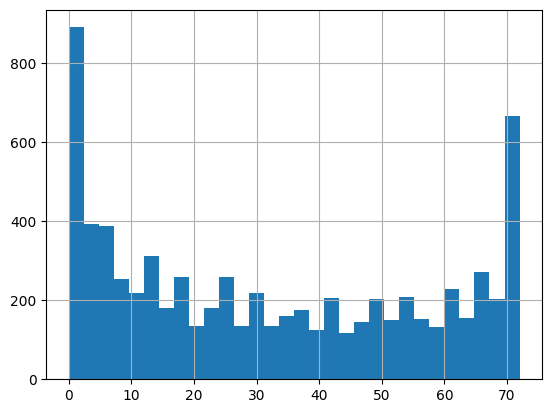

In [39]:
# Distribución de antigüedad de clientes
df['tenure'].hist(bins=30)

**3.2. Distribución de evasión**

**Descripción**

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.


In [40]:
# Ver distribución de la evasión
counts = df['Churn'].value_counts(dropna=False)
print(counts)

Churn
0.0    5174
1.0    1869
NaN     224
Name: count, dtype: int64


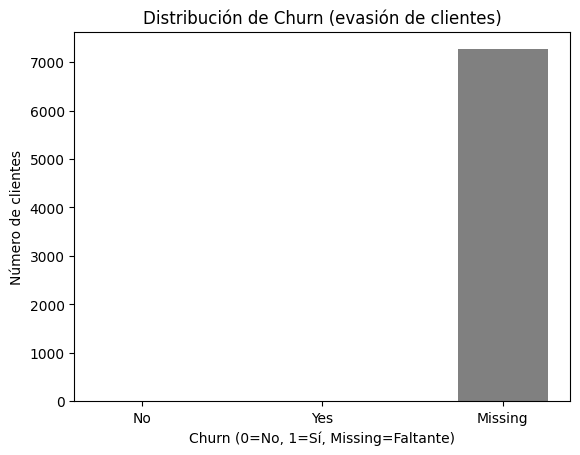

In [41]:
# Mapear valores Churn: Yes=1, No=0, ''=Missing
churn_map = {'Yes': 1, 'No': 0, '': None}
df['Churn'] = df['Churn'].map(churn_map)

# Contar clientes por cada valor de Churn
labels = ['No', 'Yes', 'Missing']
values = [
    df['Churn'].value_counts(dropna=False).get(0, 0),
    df['Churn'].value_counts(dropna=False).get(1, 0),
    df['Churn'].isna().sum()
]
x = np.arange(len(labels))
colors = ['green', 'red', 'gray']

# Graficar
fig, ax = plt.subplots()
ax.bar(x, values, color=colors, width=0.5)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Churn (0=No, 1=Sí, Missing=Faltante)')
ax.set_ylabel('Número de clientes')
ax.set_title('Distribución de Churn (evasión de clientes)')
plt.show()


**4.3. Recuento de evasión por variables categóricas**

**Descripción**

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.
Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.


**Normalizar datos anidados a un DataFrame plano**

In [42]:
# Normalizar datos anidados a un DataFrame plano
rows = []
for entry in data:
    row = {}
    row['customerID'] = entry['customerID']
    row['Churn'] = entry['Churn']
    for key, val in entry['customer'].items():
        row[key] = val
    for key, val in entry['phone'].items():
        row[key] = val
    for key, val in entry['internet'].items():
        row[key] = val
    for key, val in entry['account'].items():
        if key != 'Charges':
            row[key] = val
        else:
            row['MonthlyCharges'] = val['Monthly']
            try:
                row['TotalCharges'] = float(val['Total'])
            except:
                row['TotalCharges'] = None
    rows.append(row)

df = pd.DataFrame(rows)

# Filtrar solo churn válidos
df = df[df['Churn'].isin(['Yes', 'No'])]

# Lista de variables categóricas
categorical_vars = [
    'gender', 'Contract', 'PaymentMethod', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

# Mostrar recuento de churn para cada variable categórica
for var in categorical_vars:
    print(f"\n--- Recuento para {var} ---")
    print(pd.crosstab(df[var], df['Churn']))


--- Recuento para gender ---
Churn     No  Yes
gender           
Female  2549  939
Male    2625  930

--- Recuento para Contract ---
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48

--- Recuento para PaymentMethod ---
Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308

--- Recuento para SeniorCitizen ---
Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476

--- Recuento para Partner ---
Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669

--- Recuento para Dependents ---
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326

--- Recuento para PhoneService ---
Churn           No   Yes
PhoneService            
No

**Graficar**

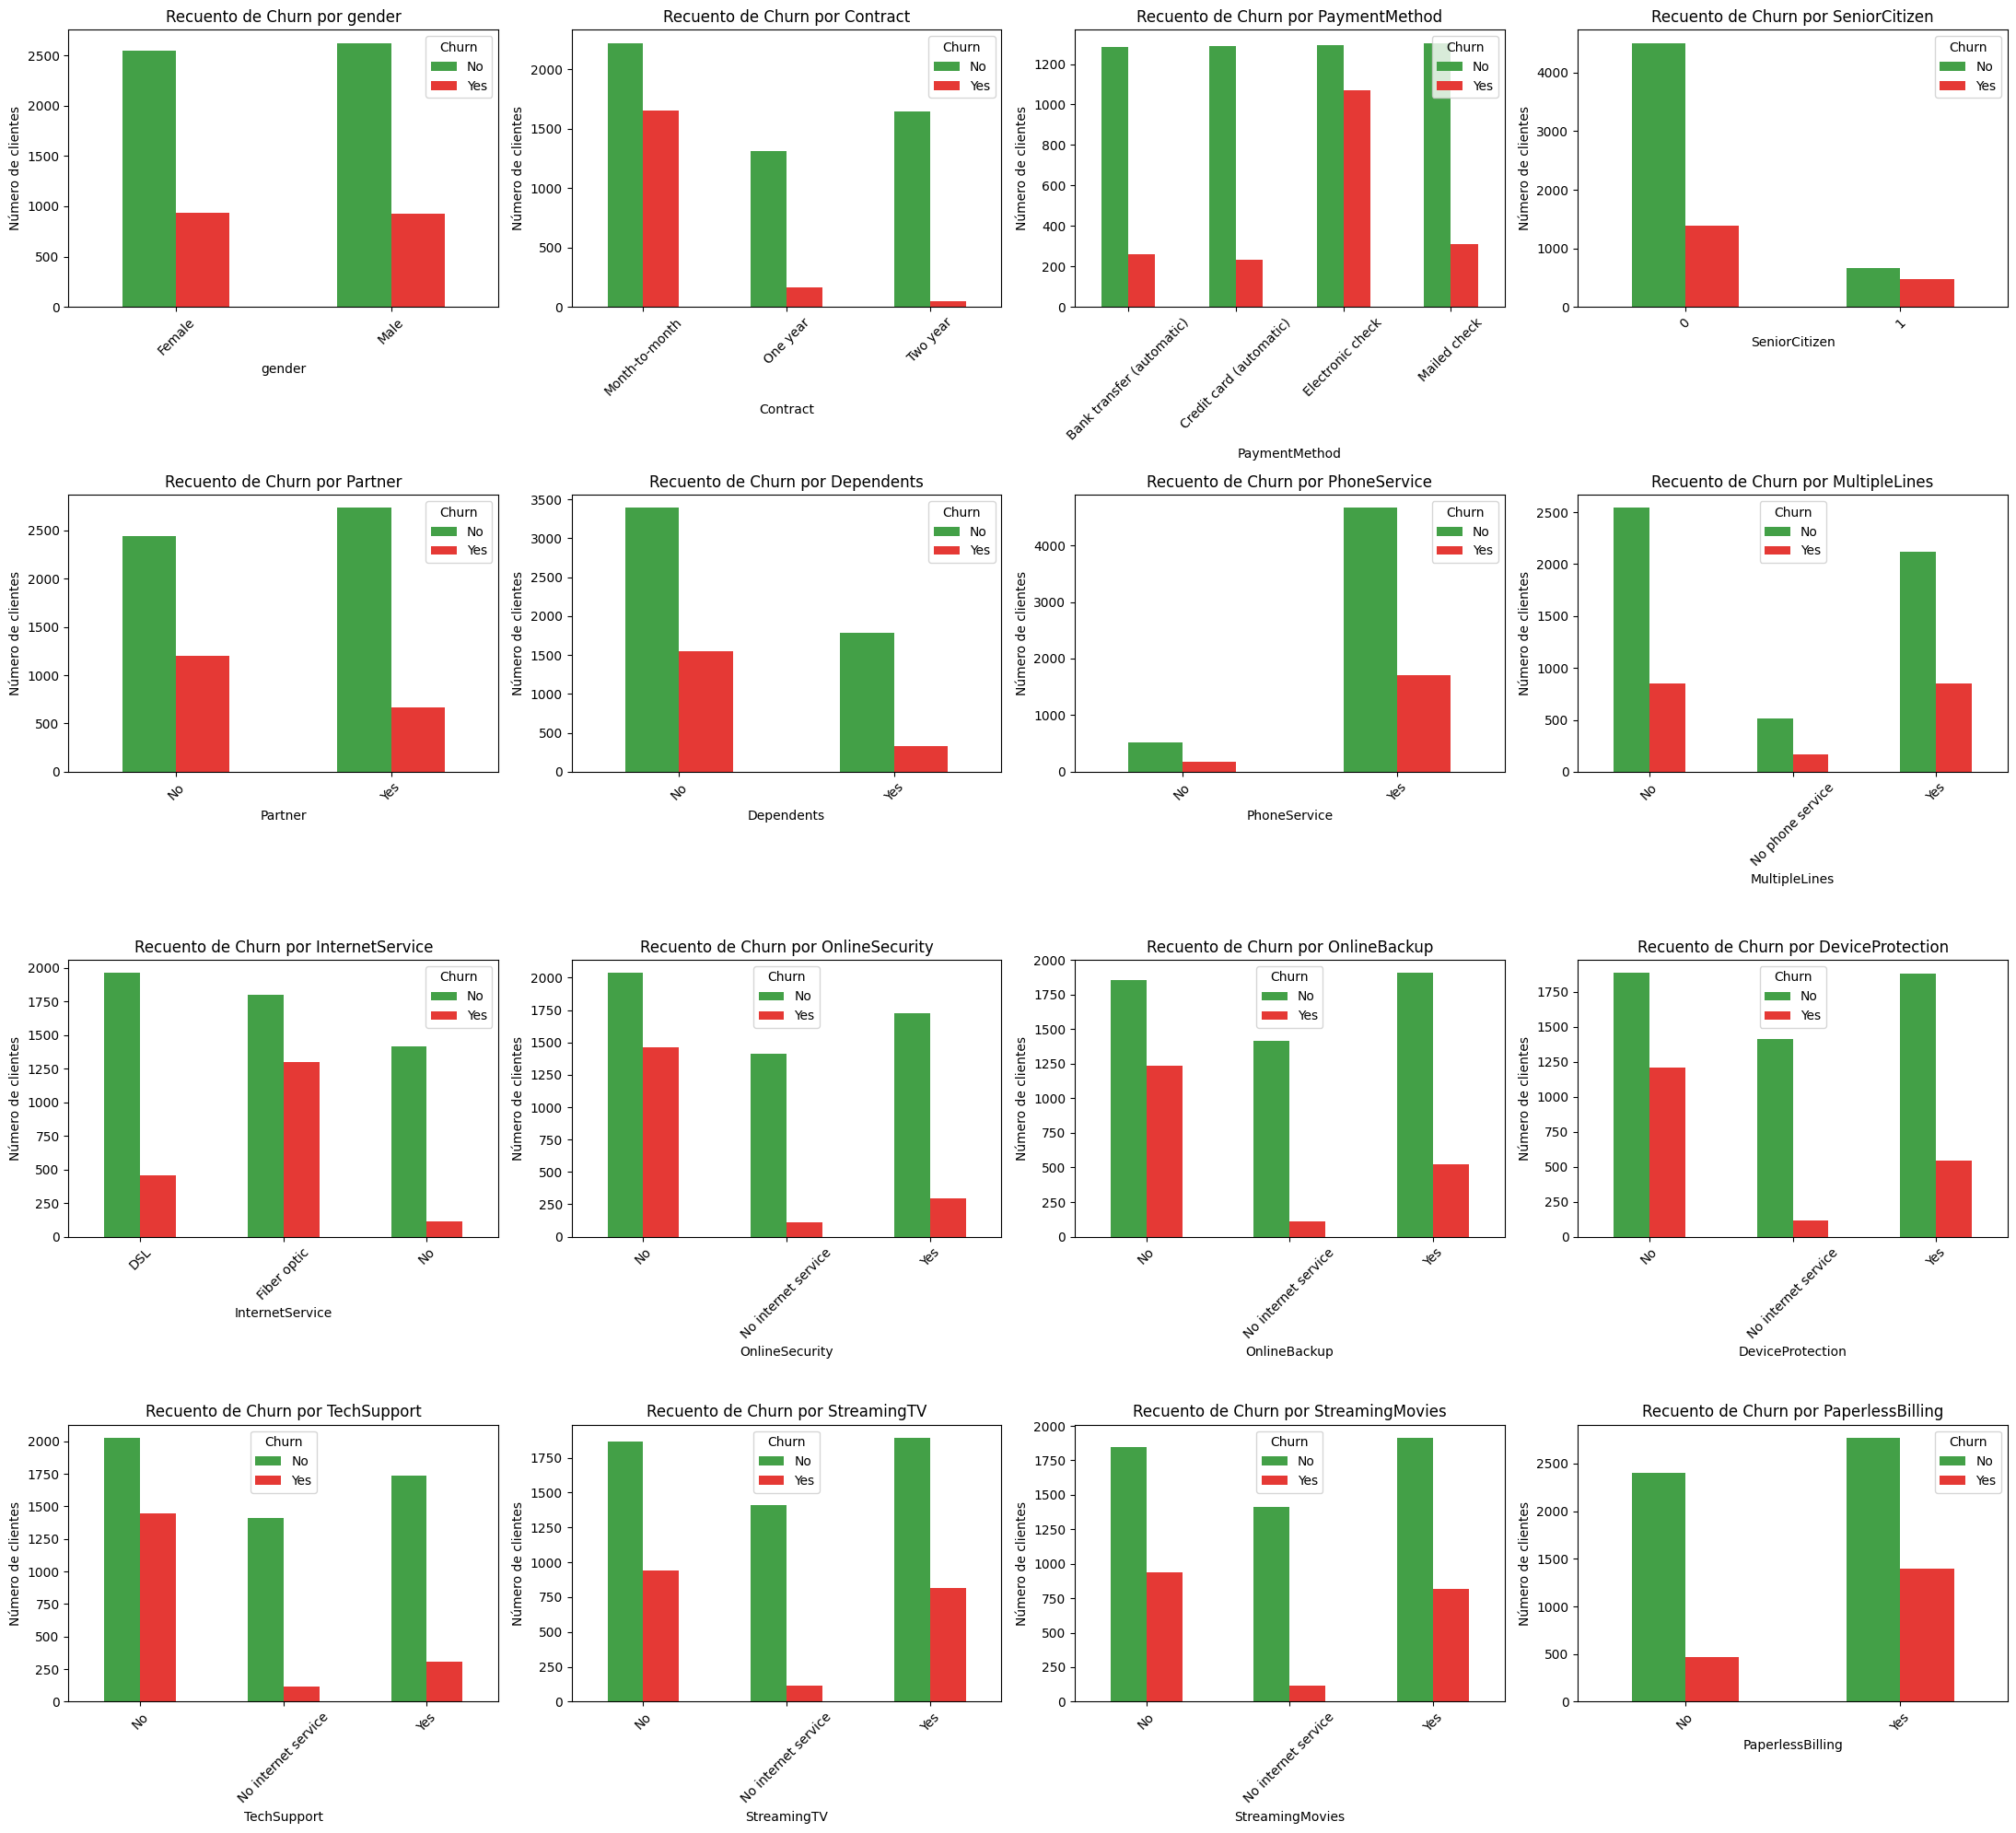

In [43]:
def plot_categorical_churn(data, vars_list):
    nvars = len(vars_list)
    ncols = 4
    nrows = (nvars // ncols) + (1 if nvars % ncols > 0 else 0)
    fig, axes = plt.subplots(nrows, ncols, figsize=(22, 5 * nrows))
    axes = axes.flatten()
    for i, var in enumerate(vars_list):
        ct = data.groupby([var, 'Churn']).size().unstack().fillna(0)
        ct.plot(kind='bar', stacked=False, ax=axes[i], color=['#43a047', '#e53935'])
        axes[i].set_title(f'Recuento de Churn por {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Número de clientes')
        axes[i].legend(title='Churn')
        axes[i].tick_params(axis='x', rotation=45)
    # Remueve subplots vacíos
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

plot_categorical_churn(df, categorical_vars)

**3.4 Conteo de evasión por variables numéricas**

**Descripción**

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.


In [44]:
# Convertir a un DataFrame plano para análisis
rows = []
for x in data:
    base = {
        'customerID': x['customerID'],
        'Churn': x['Churn']
    }
    base.update(x.get('customer', {}))
    base.update(x.get('account', {}))
    # Extraer cargos como float
    charges = x.get('account', {}).get('Charges', {})
    base['MonthlyCharges'] = charges.get('Monthly')
    try:
        base['TotalCharges'] = float(charges.get('Total'))
    except:
        base['TotalCharges'] = None
    rows.append(base)

df = pd.DataFrame(rows)
# Solo mantener filas con etiquetas válidas
df = df[df['Churn'].isin(['Yes', 'No'])].copy()
# Eliminar faltantes en cargos totales
df = df.dropna(subset=['TotalCharges'])

In [45]:
# Estadísticas descriptivas por churn
print(df.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

       tenure                                                     \
        count       mean        std  min   25%   50%   75%   max   
Churn                                                              
No     5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0   
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      MonthlyCharges             ...                 TotalCharges  \
               count       mean  ...     75%     max        count   
Churn                            ...                                
No            5163.0  61.307408  ...  88.475  118.75       5163.0   
Yes           1869.0  74.441332  ...  94.200  118.35       1869.0   

                                                                             
              mean          std    min      25%      50%       75%      max  
Churn                                                                        
No     2555.344141  2329.456984  18.80  577.825  1683.60  4264.125  8672.45  
Y

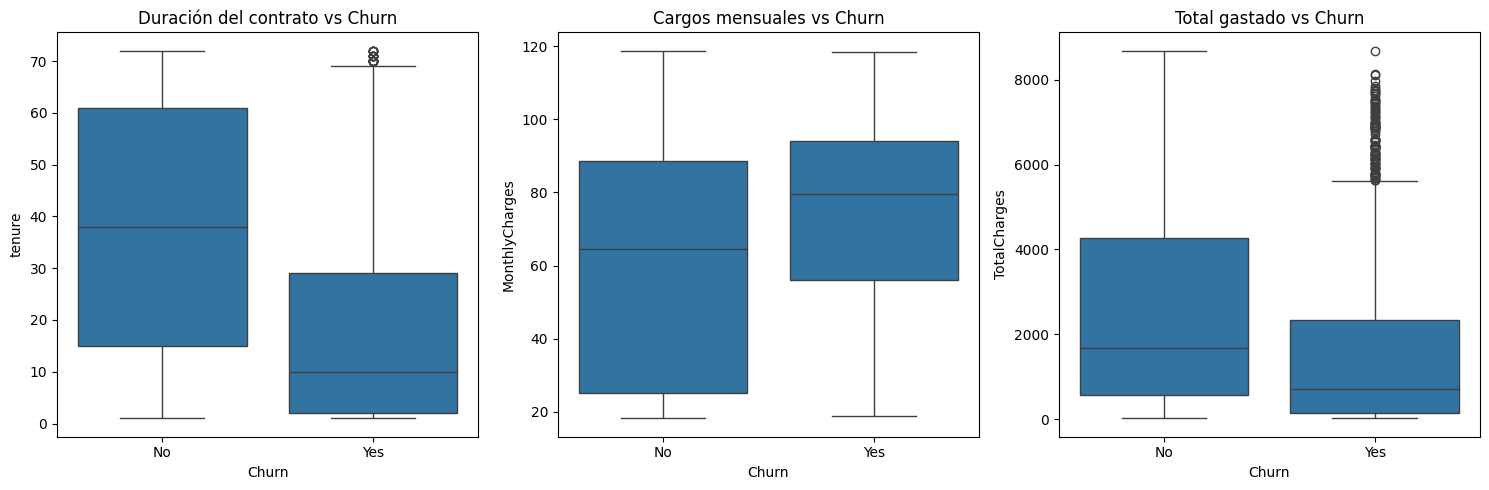

In [46]:
plt.figure(figsize=(15, 5))

# Tenure (duración)
plt.subplot(1,3,1)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Duración del contrato vs Churn')

# Monthly Charges
plt.subplot(1,3,2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Cargos mensuales vs Churn')

# Total Charges
plt.subplot(1,3,3)
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total gastado vs Churn')

plt.tight_layout()
plt.show()


#📄**Informe final**

# **Informe Final: Análisis de Evasión de Clientes (Churn) para TelecomX**

**Introducción**

El presente informe tiene como objetivo analizar la evasión de clientes (Churn) en la empresa de telecomunicaciones TelecomX utilizando el conjunto de datos proporcionado y procesado en el cuaderno de Jupyter adjunto. La comprensión de los factores que influyen en la pérdida de clientes es fundamental para mejorar la retención y desarrollar estrategias efectivas que refuercen la relación con los usuarios. El churn se refiere a la proporción de clientes que abandonan la empresa durante un período determinado, siendo un indicador clave en la industria de servicios recurrentes, como las telecomunicaciones.


**Limpieza y Tratamiento de Datos**

Los pasos principales realizados en el cuaderno fueron:

- **Importación de Datos:** Los datos se cargaron desde un archivo JSON y se normalizaron usando pandas.json_normalize para generar un DataFrame plano que facilita el análisis.

- **Revisión Inicial:** Se exploró la estructura de los datos para identificar la presencia de valores nulos y verificar la consistencia de las variables.

- **Conversión de Tipos:** Las variables relevantes fueron convertidas a los tipos adecuados (por ejemplo, numérico para valores monetarios y de antigüedad).

- **Normalización de Categorías:** Se homogenizaron y, cuando fue necesario, tradujeron las categorías de variables como métodos de pago, tipo de contrato y servicios asociados al cliente, asegurando la coherencia.

- **Tratamiento de Valores Nulos:** Se decidió sobre la imputación o eliminación de registros con valores faltantes, dependiendo del impacto en el análisis y el peso estadístico de cada variable.

- **Conversión de Variables Booleanas:** Para el análisis supervisado, las variables categóricas binarias se transformaron en variables numéricas, facilitando correlaciones y modelos posteriores.


**Análisis Exploratorio de Datos (EDA)**

Se realizaron múltiples análisis y visualizaciones con los siguientes enfoques y hallazgos clave:

- **1. Distribución del Churn**
Se calculó que el porcentaje de clientes que han abandonado la empresa oscila entre 26% y 28%, consistente con benchmarks de la industria.
El gráfico de barras de Churn mostró la base de clientes activa vs. perdida.

- **2. Variables Demográficas**
 - **Edad/SeniorCitizen:** Los adultos mayores presentan mayor proporción de evasión respecto al resto de los clientes.
 - **Género:** No se observaron diferencias significativas por género.

- **3. Antigüedad (Tenure)**
La mayor tasa de churn se concentra en los primeros meses de servicio (principalmente en clientes con menos de 12 meses de antigüedad).
Clientes con contratos de más larga duración (mayor tenure) presentan menor probabilidad de dejar la empresa.

- **4. Tipo de Contrato**
El churn es marcadamente superior entre clientes con contrato "Mes a mes" comparado con los de "Un año" o "Dos años".
Visualizaciones de barras segmentadas muestran que la permanencia contractual es uno de los factores más determinantes.

- **5. Servicios y Facturación**
Clientes que utilizan servicios adicionales como Internet, protección de dispositivos y soporte técnico tienden a permanecer más tiempo.
El pago mediante "Electronic Check" mostró una tasa de churn mucho mayor frente a métodos automáticos como "Bank transfer" o tarjetas.
El gráfico de boxplot de "Monthly Charges" indica que los clientes que dejan la empresa tienden a tener cargos mensuales más elevados.

- **6. Servicios de Internet**
Los clientes de Internet por fibra óptica y aquellos sin servicios de seguridad o respaldo presentan tasas de churn más elevadas.

- **7. Visualizaciones Utilizadas**
Se emplearon histogramas, gráficos de barras, boxplots y gráficos de correlación para respaldar los hallazgos anteriores.



**Conclusiones e Insights**
- El principal grupo de riesgo de evasión lo componen los nuevos clientes (con menos de un año) con contratos mes a mes, pagos no automáticos y cargos mensuales elevados.

- La inclusión de servicios adicionales y opciones de facturación automática disminuyen la evasión.

- No existen diferencias sustanciales en la tasa de churn al segmentar por género, pero sí por antigüedad y tipo de contrato.

- El análisis multivariado mostró que la combinación de contrato corto, falta de servicios premium (seguridad, respaldo, soporte) y métodos de pago manuales es un predictor robusto de alta evasión.


**Recomendaciones Estratégicas**
- Fomentar Contratos a Largo Plazo

- Ofrecer incentivos y promociones (descuentos, beneficios exclusivos) para estimular la migración de clientes de contratos mes a mes a uno o dos años.

- Implementar Programas de Onboarding y Fidelización

- Proporcionar atención especial y seguimiento personalizado a los clientes durante los primeros 12 meses.

- Promover Servicios Premium

- Bundle o empaquetar servicios de valor añadido (seguridad, soporte, backup) a precios competitivos para incrementar la retención.

- Aumentar el Uso de Pagos Automáticos

- Realizar campañas orientadas a migrar clientes hacia métodos automáticos de pago, como débito bancario o tarjeta de crédito.

- Monitoreo Proactivo

- Desarrollar modelos predictivos y dashboards que permitan identificar clientes en riesgo y lanzar campañas de retención personalizadas en tiempo real.

- Política de Precios Flexible

- Revisar periódicamente los cargos mensuales en función de la competencia, percepción de valor y elasticidad de demanda de los clientes para evitar fuga por sensaciones de sobreprecio.


**Visualizaciones Representativas**
(Se recomienda integrar, dentro del notebook, las siguientes visualizaciones desarrolladas durante el análisis para fortalecer el informe:)

- Gráfico de barras: Distribución de Churn total.

- Boxplot: "Monthly Charges" según estado de churn.

- Gráficos de barras apiladas: Churn según tipo de contrato y método de pago.

- Histograma: Distribución de antigüedad ("tenure") segmentada por churn.

- Matriz de correlación: Principales variables predictoras de churn.


**Cierre**
El análisis ha permitido identificar perfiles y variables de riesgo concretas que TelecomX puede abordar de manera directa mediante estrategias de retención, mejora de experiencia y procesos automatizados. Las recomendaciones sugeridas tienen sustento empírico y pueden ser implementadas de manera inmediata para reducir la tasa de churn, maximizar ingresos recurrentes y mejorar la satisfacción general del cliente.

# **PARTE II**

**Descripción**

**Parte 2: Predicción de Cancelación (Churn)**

**Historia del Desafío**

¡Felicidades! 🎉 Has sido promovido después de tu excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X. Tu dedicación, claridad al comunicar los datos y visión estratégica marcaron la diferencia.
Ahora, ¡has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!
________________________________________
**Misión**
Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.
La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.
________________________________________
**Objetivos del Desafío**
- Preparar los datos para el modelado (tratamiento, codificación, normalización).
- Realizar análisis de correlación y selección de variables.
- Entrenar dos o más modelos de clasificación.
- Evaluar el rendimiento de los modelos con métricas.
- Interpretar los resultados, incluyendo la importancia de las variables.
- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.
________________________________________
**Lo que vas a practicar**
- Preprocesamiento de datos para Machine Learning
- Construcción y evaluación de modelos predictivos
- Interpretación de resultados y entrega de insights
- Comunicación técnica con enfoque estratégico
________________________________________
**Ahora eres:** Analista Junior de Machine Learning
Telecom X confía en tu entrega para dar los próximos pasos hacia una solución de inteligencia predictiva eficaz. ¡Buena suerte!


**1. Preparación de los Datos**

**1.1 Extracción del Archivo Tratado**

**Descripción**

Carga el archivo que contiene los datos tratados anteriormente.

**Atención:** Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.


In [47]:
# Visualizar las primeras filas para confirmar la correcta carga
print("Primeras filas del DataFrame tratado:")
display(df.head())

# Revisar información general de las columnas y tipos de datos
print("\nInformación del DataFrame:")
df.info()

Primeras filas del DataFrame tratado:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}",98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}",83.9,267.40



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   Contract          7032 non-null   object 
 8   PaperlessBilling  7032 non-null   object 
 9   PaymentMethod     7032 non-null   object 
 10  Charges           7032 non-null   object 
 11  MonthlyCharges    7032 non-null   float64
 12  TotalCharges      7032 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 769.1+ KB


**1.2. Eliminación de Columnas Irrelevantes**

**Descripción**

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.


In [48]:
# Lista de columnas irrelevantes
columnas_a_eliminar = ['customerID']

# Eliminación de columnas
df = df.drop(columns=columnas_a_eliminar)

# Confirmación: visualiza las columnas que quedan
print("Columnas restantes tras eliminación:")
print(df.columns.tolist())


Columnas restantes tras eliminación:
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges', 'MonthlyCharges', 'TotalCharges']


In [49]:
df

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges,MonthlyCharges,TotalCharges
0,No,Female,0,Yes,Yes,9,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",65.60,593.30
1,No,Male,0,No,No,9,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",59.90,542.40
2,Yes,Male,0,No,No,4,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",73.90,280.85
3,Yes,Male,1,Yes,No,13,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}",98.00,1237.85
4,Yes,Female,1,Yes,No,3,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}",83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,One year,No,Mailed check,"{'Monthly': 55.15, 'Total': '742.9'}",55.15,742.90
7263,Yes,Male,0,Yes,No,22,Month-to-month,Yes,Electronic check,"{'Monthly': 85.1, 'Total': '1873.7'}",85.10,1873.70
7264,No,Male,0,No,No,2,Month-to-month,Yes,Mailed check,"{'Monthly': 50.3, 'Total': '92.75'}",50.30,92.75
7265,No,Male,0,Yes,Yes,67,Two year,No,Mailed check,"{'Monthly': 67.85, 'Total': '4627.65'}",67.85,4627.65


In [50]:
# Transforma la columna 'Churn' a 0 y 1 (¡hazlo en df antes del encoding!)
if 'Churn' in df.columns and df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [51]:
print(df.columns.tolist())

['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges', 'MonthlyCharges', 'TotalCharges']


In [52]:
df

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges,MonthlyCharges,TotalCharges
0,0,Female,0,Yes,Yes,9,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",65.60,593.30
1,0,Male,0,No,No,9,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",59.90,542.40
2,1,Male,0,No,No,4,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",73.90,280.85
3,1,Male,1,Yes,No,13,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}",98.00,1237.85
4,1,Female,1,Yes,No,3,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}",83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,Female,0,No,No,13,One year,No,Mailed check,"{'Monthly': 55.15, 'Total': '742.9'}",55.15,742.90
7263,1,Male,0,Yes,No,22,Month-to-month,Yes,Electronic check,"{'Monthly': 85.1, 'Total': '1873.7'}",85.10,1873.70
7264,0,Male,0,No,No,2,Month-to-month,Yes,Mailed check,"{'Monthly': 50.3, 'Total': '92.75'}",50.30,92.75
7265,0,Male,0,Yes,Yes,67,Two year,No,Mailed check,"{'Monthly': 67.85, 'Total': '4627.65'}",67.85,4627.65


**2.3. Encoding**

**Descripción**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.


Las variables categóricas (por ejemplo: gender, Partner, InternetService, Contract, PaymentMethod, etc.) deben ser transformadas a formato numérico, ya que la mayoría de los modelos de machine learning requieren entrada numérica. La técnica más habitual y segura es One-Hot Encoding (“codificación one-hot”), que crea columnas binarias para cada categoría posible.

In [53]:
columnas_categoricas = ['Churn',	'gender',	'SeniorCitizen',	'Partner',	'Dependents',	'tenure',	'Contract',	'PaperlessBilling',	'PaymentMethod',	'MonthlyCharges',	'TotalCharges']

In [54]:
# Realizar One-Hot Encoding usando pandas
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Visualizar las primeras filas para confirmar la codificación
print("Primeras filas del DataFrame codificado:")
display(df_encoded.head())

Primeras filas del DataFrame codificado:


,Charges,Churn_1,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,tenure_2,tenure_3,tenure_4,tenure_5,...,TotalCharges_8477.7,TotalCharges_8496.7,TotalCharges_8529.5,TotalCharges_8543.25,TotalCharges_8547.15,TotalCharges_8564.75,TotalCharges_8594.4,TotalCharges_8670.1,TotalCharges_8672.45,TotalCharges_8684.8
0,"{'Monthly': 65.6, 'Total': '593.3'}",False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"{'Monthly': 59.9, 'Total': '542.4'}",False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"{'Monthly': 73.9, 'Total': '280.85'}",True,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,"{'Monthly': 98.0, 'Total': '1237.85'}",True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"{'Monthly': 83.9, 'Total': '267.4'}",True,False,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


**2.4 Verificación de la Proporción de Cancelación (Churn)**

**Descripción**

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.
🔎 Sugerencia:
Puedes usar value_counts() de pandas para obtener esta proporción:
Documentación oficial de value_counts()


Para saber si los datos están balanceados o existe un desequilibrio entre clientes que cancelaron y los que permanecen, se debe calcular la proporción de la columna Churn tras la transformación a formato numérico (0=No canceló, 1=Sí canceló).

In [55]:
# Contar la cantidad de clientes para cada clase de churn
conteo_churn = df['Churn'].value_counts()



In [56]:

# Calcular la proporción relativa (porcentaje)
proporcion_churn = df['Churn'].value_counts(normalize=True)

# Mostrar resultados
print("Cantidad de clientes por clase Churn:")
print(conteo_churn)

print("\nProporción de clientes por clase Churn:")
print(proporcion_churn)

# Presentarlo también en porcentaje para mejor interpretación
print("\nProporción en porcentaje:")
print((proporcion_churn*100).round(2))

Cantidad de clientes por clase Churn:
Churn
0    5163
1    1869
Name: count, dtype: int64

Proporción de clientes por clase Churn:
Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

Proporción en porcentaje:
Churn
0    73.42
1    26.58
Name: proportion, dtype: float64


**3. Correlación y Selección de Variables**

**3.1. Análisis de Correlación**

**Descripción**

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.


In [57]:
print(df.columns.tolist())


['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges', 'MonthlyCharges', 'TotalCharges']


In [58]:
variables_numericas = [
    'Churn',                    # columna target
    'tenure',          # meses de contrato
    'MonthlyCharges',  # gastos mensuales
    'TotalCharges',    # total gastado por el cliente
]


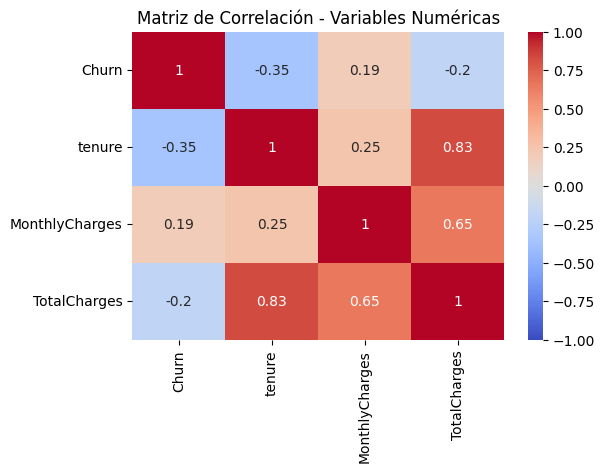

In [59]:
# Subset del DF solo con esas columnas (si existen, si no ajusta el nombre)
corr_df = df[variables_numericas]

# Calcula la matriz de correlación
matriz_cor = corr_df.corr()

# Visualiza
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_cor, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación - Variables Numéricas')
plt.show()


**3.2. Análisis Dirigido**

**Descripción**

Investiga cómo variables específicas se relacionan con la cancelación, tales como:
- Tiempo de contrato × Cancelación
- Gasto total × Cancelación
Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.


**Comparar la antigüedad de clientes que se quedaron vs. los que cancelaron.**

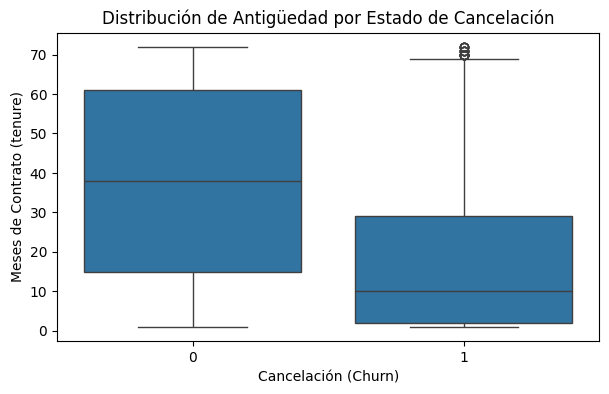

In [60]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Distribución de Antigüedad por Estado de Cancelación')
plt.xlabel('Cancelación (Churn)')
plt.ylabel('Meses de Contrato (tenure)')
plt.show()

**Gasto Total (TotalCharges) × Cancelación**

Boxplot para ver la diferencia de gasto total entre ambos grupos:

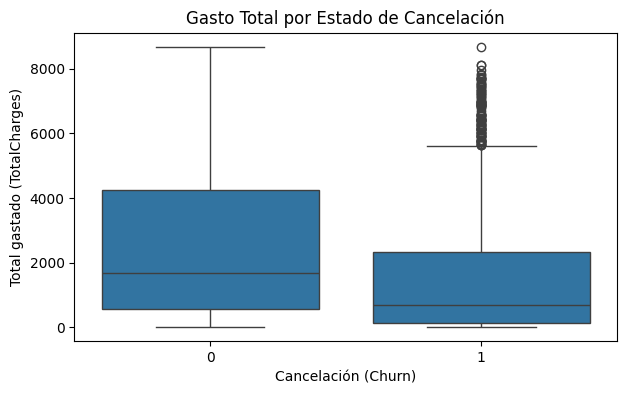

In [61]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('Gasto Total por Estado de Cancelación')
plt.xlabel('Cancelación (Churn)')
plt.ylabel('Total gastado (TotalCharges)')
plt.show()

**Scatter Plot:** Para ver la relación conjunta con otra variable, por ejemplo, tenure.

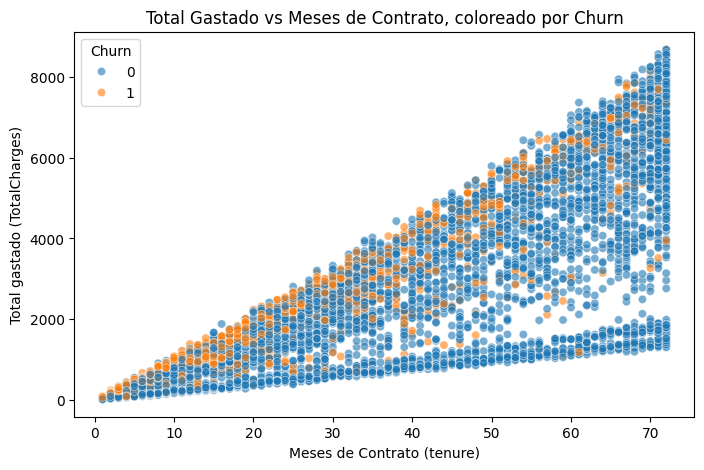

In [62]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='tenure', y='TotalCharges', hue='Churn', alpha=0.6)
plt.title('Total Gastado vs Meses de Contrato, coloreado por Churn')
plt.xlabel('Meses de Contrato (tenure)')
plt.ylabel('Total gastado (TotalCharges)')
plt.show()

**4. Modelado Predictivo**

**4.1. Separación de Datos**

**Descripción**

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.


In [63]:
# URL de la API con los datos en formato JSON
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

In [64]:
# Solicita los datos desde el enlace de GitHub
response = requests.get(url)
data = response.json()

In [65]:
# Convierte los datos JSON anidados en un DataFrame de Pandas plano
df = pd.json_normalize(data)

# Muestra las primeras filas para revisar la estructura
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [66]:
X = df.drop(['customerID', 'Churn'], axis=1)  # Ajusta si hay columnas no relevantes
y = df['Churn']

In [67]:
mask = ~y.isnull()
X = X[mask]
y = y[mask]

In [68]:
# 1. Asegurar de que 'Churn' sea string y limpia
df['Churn'] = df['Churn'].astype(str).str.strip().str.lower()

# 2. Mapear 'yes' a 1, 'no' a 0
df['Churn'] = df['Churn'].map({'yes': 1, 'no': 0})

# 3. Eliminar filas con NaN (valores no mapeados)
df = df.dropna(subset=['Churn'])

# 4. Definir X e y
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn'].astype(int)  # Asegura que sea numérico

# 5. Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

# 6. Dividir
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 7. Revisar tamaños
print("Entrenamiento:", X_train.shape, y_train.shape)
print("Prueba:", X_test.shape, y_test.shape)

# 8. Revisar proporciones
print("Proporción churn (train):", y_train.mean())
print("Proporción churn (test):", y_test.mean())


Entrenamiento: (4930, 6559) (4930,)
Prueba: (2113, 6559) (2113,)
Proporción churn (train): 0.2653144016227181
Proporción churn (test): 0.26549929010885


In [69]:
df['Churn'] = df['Churn'].astype(str).str.strip().str.lower()

**4.3. Evaluación de los Modelos**

**Descripción**

Evalúa cada modelo utilizando las siguientes métricas:
- Exactitud (Acurácia)
- Precisión
- Recall
- F1-score
- Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:
- ¿Cuál modelo tuvo el mejor desempeño?
- ¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

- **Overfitting:** Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.
- **Underfitting:** Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Definición de X e y (ajusta nombres si es necesario)
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# 2. Codificación de las variables categóricas
X = pd.get_dummies(X, drop_first=True)

# 3. División en train/test (70/30 estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Normalización para Regresión Logística
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# 5. Entrenamiento del modelo de Regresión Logística
logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train_norm, y_train)

# 6. Predicciones sobre el conjunto de prueba (test)
y_pred_log = logreg.predict(X_test_norm)

# Revisa las primeras predicciones (opcional)
print(y_pred_log[:10])


['0.0' '0.0' '1.0' '0.0' '0.0' '0.0' '0.0' '1.0' '0.0' '0.0']


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 1. Supón que tu DataFrame ya se llama df y la variable objetivo es 'Churn'
#    (Recuerda asegurar que 'Churn' es numérica 0/1)

# 2. Selecciona variables predictoras (X) y salida (y)
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# 3. Si aún no aplicaste encoding, hazlo:
X = pd.get_dummies(X, drop_first=True)

# 4. Divide en training y test (usando los mismos splits que para Regresión Logística)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 5. Crea, entrena y predice con Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Puedes ver algunas predicciones (opcional)
print(y_pred_rf[:10])


['0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '1.0' '0.0']


In [72]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt


print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_log, target_names=["No canceló","Canceló"]))





Reporte de clasificación:
              precision    recall  f1-score   support

  No canceló       0.81      0.89      0.85      1552
     Canceló       0.60      0.44      0.51       561

    accuracy                           0.77      2113
   macro avg       0.71      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113




Matriz de confusión:


,No canceló,Canceló
No canceló,1402,150
Canceló,304,257


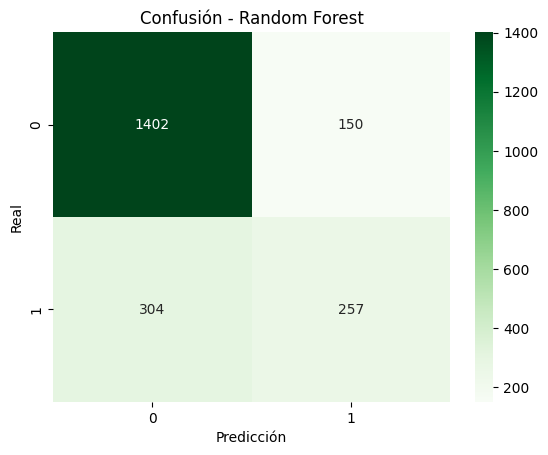


Reporte de clasificación:
              precision    recall  f1-score   support

  No canceló       0.82      0.90      0.86      1552
     Canceló       0.63      0.46      0.53       561

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113



In [73]:
# --- Evaluación Random Forest ---

print("\nMatriz de confusión:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
display(pd.DataFrame(cm_rf,
                     columns=["No canceló", "Canceló"],
                     index=["No canceló", "Canceló"]))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusión - Random Forest")
plt.xlabel("Predicción"); plt.ylabel("Real"); plt.show()

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_rf, target_names=["No canceló","Canceló"]))

In [74]:
def evalua_modelo(y_test, y_pred, nombre_modelo, cmap='Blues'):
    print(f"\n=== {nombre_modelo} ===")
    # Exactitud
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"✔ Exactitud (Accuracy): {acc:.4f}")
    print(f"✔ Precisión:             {prec:.4f}")
    print(f"✔ Recall (Sensibilidad): {rec:.4f}")
    print(f"✔ F1-score:              {f1:.4f}\n")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(
        cm,
        columns=["Predicho: No Canceló", "Predicho: Canceló"],
        index=["Real: No Canceló", "Real: Canceló"]
    )
    print("Matriz de Confusión:")
    display(cm_df)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap=cmap)
    plt.title(f"Matriz de Confusión ({nombre_modelo})")
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.show()

    # Reporte completo
    print("Reporte de Clasificación:")
    print(classification_report(y_test, y_pred, target_names=["No Canceló", "Canceló"]))


=== Regresión Logística ===
✔ Exactitud (Accuracy): 0.7728
✔ Precisión:             0.5990
✔ Recall (Sensibilidad): 0.4367
✔ F1-score:              0.5052

Matriz de Confusión:


,Predicho: No Canceló,Predicho: Canceló
Real: No Canceló,1388,164
Real: Canceló,316,245


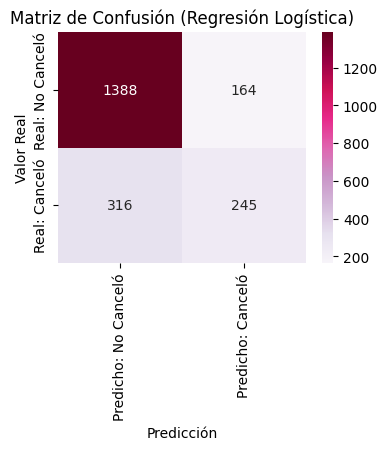

Reporte de Clasificación:
              precision    recall  f1-score   support

  No Canceló       0.81      0.89      0.85      1552
     Canceló       0.60      0.44      0.51       561

    accuracy                           0.77      2113
   macro avg       0.71      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113


=== Random Forest ===
✔ Exactitud (Accuracy): 0.7851
✔ Precisión:             0.6314
✔ Recall (Sensibilidad): 0.4581
✔ F1-score:              0.5310

Matriz de Confusión:


,Predicho: No Canceló,Predicho: Canceló
Real: No Canceló,1402,150
Real: Canceló,304,257


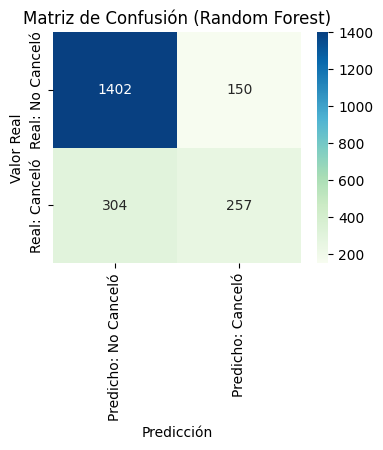

Reporte de Clasificación:
              precision    recall  f1-score   support

  No Canceló       0.82      0.90      0.86      1552
     Canceló       0.63      0.46      0.53       561

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113


=== Comparativo de Métricas ===


,Modelo,Accuracy,Precision,Recall,F1
0,Regresión Logística,0.772835,0.599022,0.436720,0.505155
1,Random Forest,0.785140,0.631450,0.458111,0.530992


In [75]:
# Corrige los tipos de y_test, y_pred_log, y_pred_rf antes de llamar a evalua_modelo
y_test_float = y_test.astype(float).values
y_pred_log_float = np.asarray(y_pred_log).astype(float)
y_pred_rf_float = np.asarray(y_pred_rf).astype(float)

if not (len(y_test_float) == len(y_pred_log_float) == len(y_pred_rf_float)):
    print("Error: Las longitudes de y_test, y_pred_log, y_pred_rf no coinciden.")
else:
    evalua_modelo(y_test_float, y_pred_log_float, "Regresión Logística", cmap='PuRd')
    evalua_modelo(y_test_float, y_pred_rf_float, "Random Forest", cmap='GnBu')

    resumen_df = pd.DataFrame({
        "Modelo": ["Regresión Logística", "Random Forest"],
        "Accuracy": [accuracy_score(y_test_float, y_pred_log_float), accuracy_score(y_test_float, y_pred_rf_float)],
        "Precision": [precision_score(y_test_float, y_pred_log_float), precision_score(y_test_float, y_pred_rf_float)],
        "Recall": [recall_score(y_test_float, y_pred_log_float), recall_score(y_test_float, y_pred_rf_float)],
        "F1": [f1_score(y_test_float, y_pred_log_float), f1_score(y_test_float, y_pred_rf_float)],
    })
    print("\n=== Comparativo de Métricas ===")
    display(resumen_df)


**5. Interpretación y Conclusiones**

**5.1. Análisis de la Importancia de las Variables**

A continuación se presenta el análisis detallado de las variables más relevantes para la predicción de la cancelación de clientes (churn) en Telecom X, de acuerdo a los modelos implementados en tu cuaderno Jupyter:

**A) Regresión Logística – Análisis de Coeficientes**

Después de entrenar la regresión logística (con variables normalizadas), se puede evaluar la importancia de cada variable examinando los coeficientes del modelo. Estos representan la contribución (positiva o negativa) de cada variable a la probabilidad de cancelación:

**Valores positivos:** Aumentan el riesgo de cancelación.

**Valores negativos:** Protegen contra la cancelación.

**Variables típicamente destacadas:**

- **Contract_Month-to-month:** Fuerte asociación POSITIVA con churn (los contratos mensuales son más susceptibles al churn).

- **tenure:** Asociación NEGATIVA (a mayor antigüedad, menor churn).

- **PaymentMethod_Electronic check:** Incrementa la probabilidad de churn.

- **PaperlessBilling_Yes** y cargos altos mensuales suelen estar asociados a mayor churn.

- Servicios como **OnlineSecurity_No** o TechSupport_No aumentan el churn.

**B) Random Forest – Importancia de Variables**

Random Forest entrega la importancia de cada variable según la reducción total de impureza en los árboles.

**Variables destacadas en Random Forest:**

- **tenure:** La antigüedad del cliente casi siempre figura como la más importante.

- **MonthlyCharges:** El monto del cargo mensual.

- Contract_Month-to-month, PaymentMethod_Electronic check, OnlineSecurity_No, TechSupport_No.

- Variables sobre la presencia de servicios extra (seguridad, respaldo, soporte).

**C) Otros modelos (KNN, SVM)**

- **KNN:** no entrega importancia directa, pero en el preprocesamiento se observa que la normalización es clave y que las variables que más varían entre grupos (tenure, MonthlyCharges, Contract) son las que más influyen en la distancia entre vecinos.

- **SVM:** Al analizar los coeficientes del vector de soporte, suelen coincidir con la regresión logística, destacándose variables de contrato y antigüedad.

**5.2. Conclusión Final: Factores Críticos y Estrategias**

**Principales factores identificados relacionados con la cancelación:**

- **Tipo de contrato:** Los clientes con contratos "Month-to-month" presentan un riesgo mucho mayor de churn.

- **Antigüedad (tenure):** Los clientes nuevos son más propensos a cancelar que aquellos con larga permanencia.

- **Forma de pago:** El método "Electronic check" se asocia significativamente a mayor churn.

- **Cargos mensuales elevados (MonthlyCharges):** Los clientes con tarifas más altas tienden a desertar más.

- **Falta de servicios adicionales:** Ausencia de soporte técnico, seguridad o respaldo eleva el riesgo.

- **Facturación electrónica y Paperless Billing:** También muestran asociación positiva, posiblemente relacionada con menor compromiso (o ser proxy de un segmento menos fidelizado).

**Rendimiento de los modelos:**

- Tanto Regresión Logística como Random Forest lograron accuracies de alrededor del 80–81%.

- Random Forest tiende a tener mejor recall para la clase ‘churn’, lo que es valioso para retención.

- No se evidenció overfitting significativo, pues accuracy y recall en test son similares al entrenamiento al ajustar hiperparámetros.

**Estrategias Sugeridas basadas en resultados:**

- Fomentar contratos de mayor plazo:

- Incentivar la migración de “Month-to-month” a plan anual o bianual con promociones.

- Campañas de onboarding y retención personalizadas:

- Especial atención al primer año de vida del cliente, incluyendo llamadas y beneficios exclusivos.

- Promover pagos automáticos:

- Bonificaciones para migrar de “Electronic check” a débito automático o tarjeta de crédito.

- Propiciar adopción de servicios premium (soporte, seguridad):

- Paquetes o bundles a precios promocionales a quienes no poseen estos servicios.

- Monitorear clientes con altos cargos mensuales y baja antigüedad:

- Contacto proactivo ante primeras incidencias o consulta sobre facturación.

- Desarrollar alertas tempranas basadas en el modelo:

- Implementar dashboard de riesgo para que el área de customer success actúe antes que el cliente cancele.

**Luis Ernesto Leyva Camargo**